In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("./matches.csv")
df.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [12]:
df.isnull().sum()  # Check for null values
df.dropna(inplace=True)  # Drop rows with null values
df.drop_duplicates(inplace=True)  # Drop duplicates
df['date'] = pd.to_datetime(df['date'])  # Convert date column to datetime
df['day'] = df['date'].dt.day  # Extract day from date
df['month'] = df['date'].dt.month  # Extract month from date
df['year'] = df['date'].dt.year  # Extract year from date
df['day_of_week'] = df['date'].dt.day_name()  # Extract day of the week from date


 ## Analyze Top Teams, Batsmen, and Bowlers

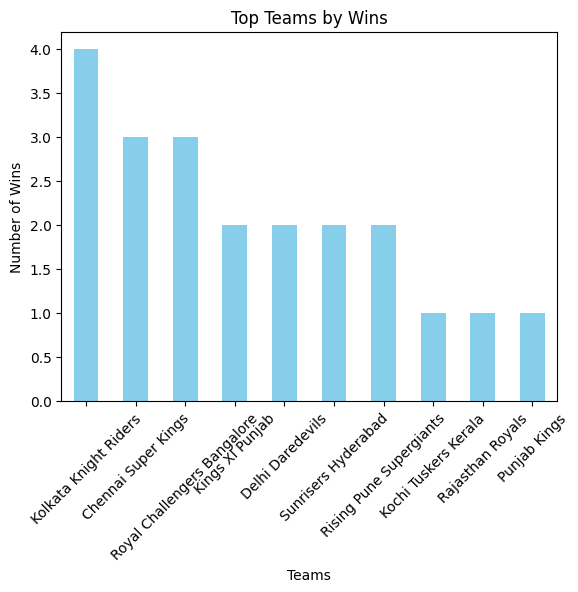

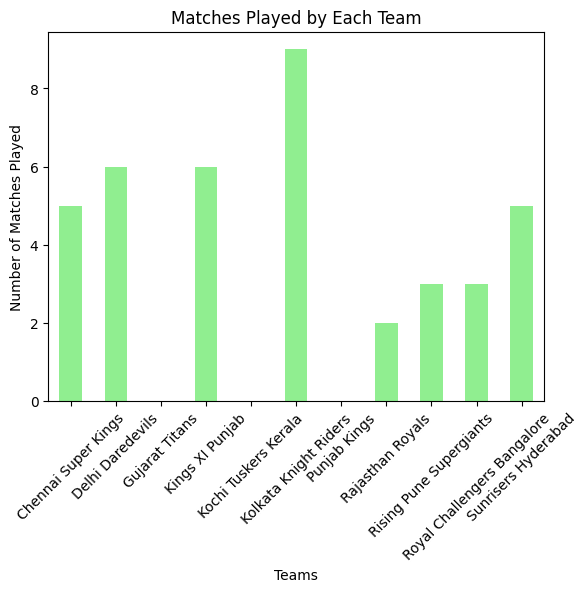

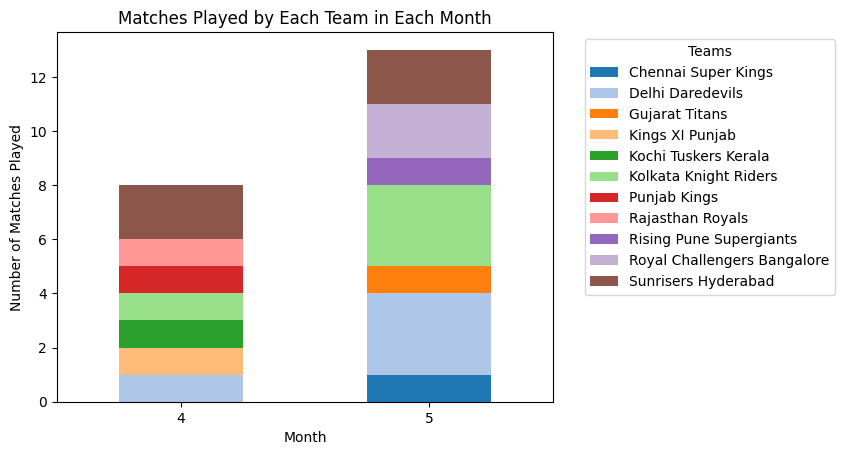

In [14]:
team_wins = df['winner'].value_counts()
team_wins.plot(kind='bar', color='skyblue')
plt.title('Top Teams by Wins')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()
# Plotting the number of matches played by each team
matches_played = df['team1'].value_counts() + df['team2'].value_counts()
matches_played.plot(kind='bar', color='lightgreen')
plt.title('Matches Played by Each Team')
plt.xlabel('Teams')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=45)
plt.show()
# Plotting the number of matches played by each team in each month
matches_played_by_month = df.groupby(['month', 'team1']).size().unstack(fill_value=0)
matches_played_by_month.plot(kind='bar', stacked=True, color=plt.cm.tab20.colors)
plt.title('Matches Played by Each Team in Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=0)
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Visualize Winning Percentages and Toss Decisions

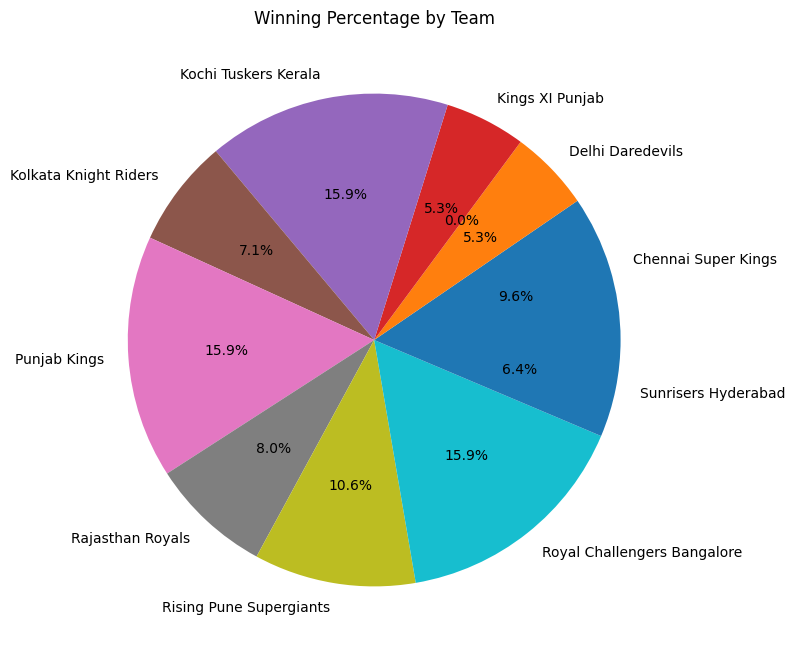

In [20]:
total_matches = pd.concat([df['team1'], df['team2']]).value_counts()
total_wins = df['winner'].value_counts()
win_percentage = (total_wins / total_matches) * 100
win_percentage.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Winning Percentage by Team')
plt.ylabel('')
plt.show()
# Plotting the number of matches played by each team in each year



### ➤ Toss Decision Analysis

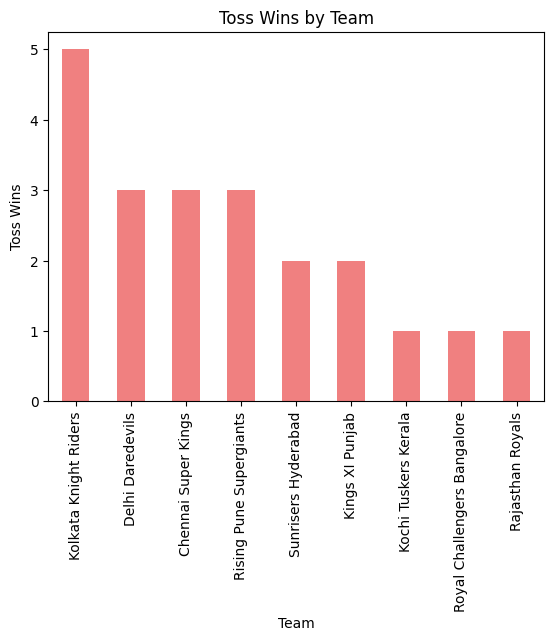

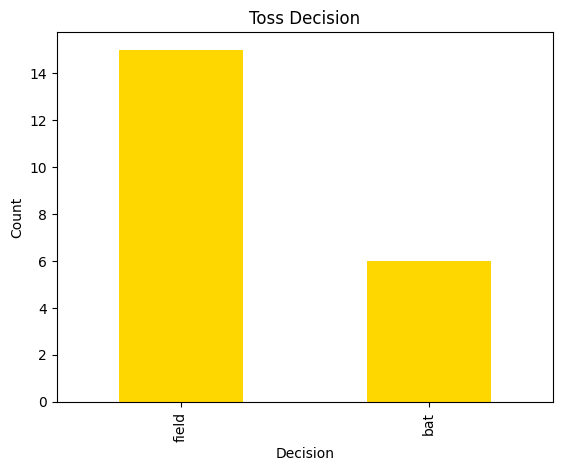

In [21]:
toss_data = df['toss_winner'].value_counts()
toss_decision = df['toss_decision'].value_counts()
toss_data.plot(kind='bar', color='lightcoral', title='Toss Wins by Team')
plt.xlabel('Team')
plt.ylabel('Toss Wins')
plt.show()

toss_decision.plot(kind='bar', color='gold', title='Toss Decision')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()
